# Analyze for modelling

# 1. Imports

## 1.1 Packages

In [1]:
import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose


In [2]:
from stock_data.pipelines.feature_engineering.nodes import add_test_indicator

## 1.2 Options

In [3]:
path_data = "../data/04_feature/"

## 1.3 Dataset

In [4]:
df_aapl = pd.read_parquet(os.path.join(path_data, "df_aapl_engineered.parquet"))

# 2. Analyze

In [5]:
df_aapl

Price,Date,Close,High,Low,Open,Volume,test,validation
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2020-01-02,72.716072,72.776598,71.466812,71.721019,135480400,False,False
1,2020-01-03,72.009132,72.771760,71.783977,71.941343,146322800,False,False
2,2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200,False,False
3,2020-01-07,72.241554,72.849231,72.021238,72.592601,108872000,False,False
4,2020-01-08,73.403633,73.706264,71.943744,71.943744,132079200,False,False
...,...,...,...,...,...,...,...,...
1312,2025-03-24,220.729996,221.479996,218.580002,221.000000,44299500,True,False
1313,2025-03-25,223.750000,224.100006,220.080002,220.770004,34493600,True,False
1314,2025-03-26,221.529999,225.020004,220.470001,223.509995,34466100,True,False


## 2.1 Stationarity

/Users/benjaminwallyn/Git/stock-data/.venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benjaminwallyn/Git/stock-data/.venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benjaminwallyn/Git/stock-data/.venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/benjaminwallyn/Git/stock-data/.venv/lib/python3.13/site-packages/seaborn/_oldcore.py:1119: FutureWarning: us

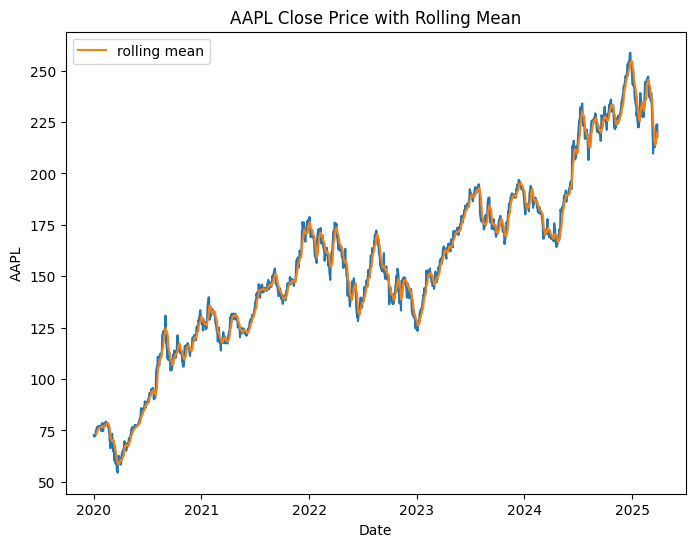

In [6]:
rolling_window = 7

f, ax = plt.subplots(figsize=(8, 6))

sns.lineplot(x=df_aapl["Date"], y=df_aapl["Close"]["AAPL"])
sns.lineplot(x=df_aapl["Date"], y=df_aapl["Close"]["AAPL"].rolling(rolling_window).mean(), label='rolling mean')
ax.set_title("AAPL Close Price with Rolling Mean")
plt.show()

## 2.2 Decomposition

In [10]:
decomp = seasonal_decompose(df_aapl["Close"]["AAPL"], period=14, model='additive', extrapolate_trend='freq')

Text(0, 0.5, 'Residual')

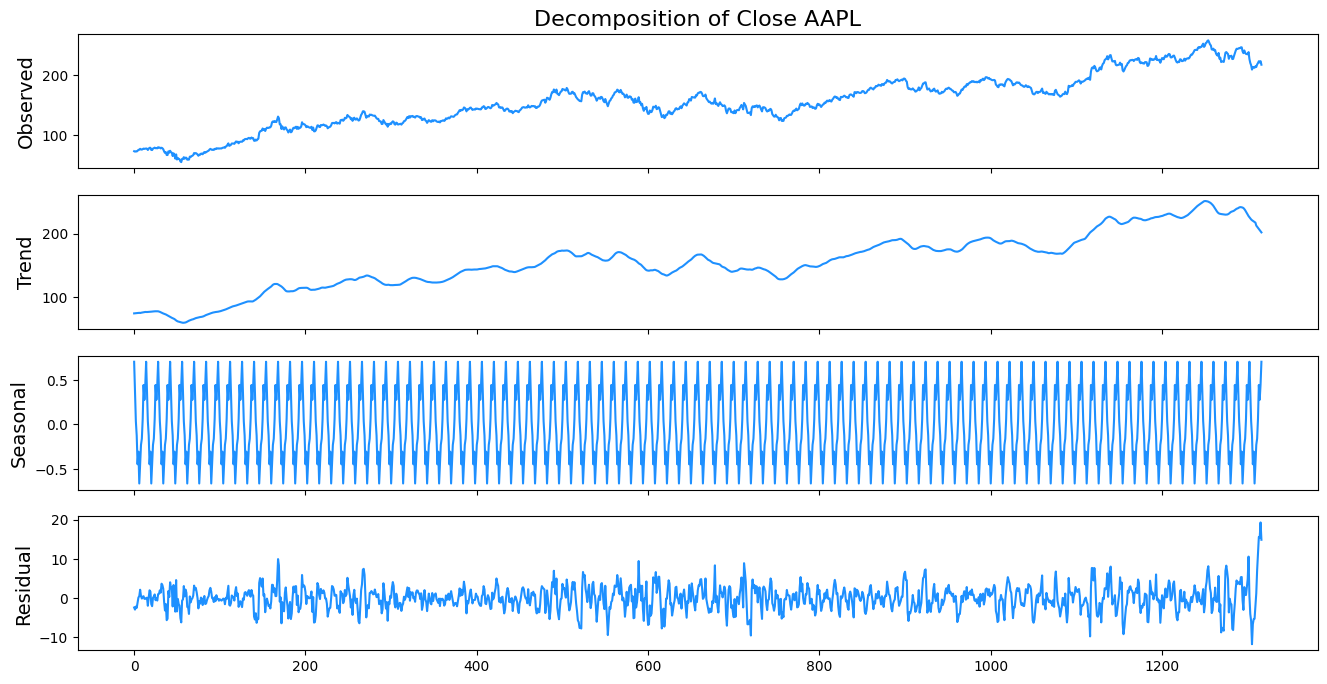

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(16,8))

ax[0].set_title('Decomposition of Close AAPL', fontsize=16)
decomp.observed.plot(ax=ax[0], legend=False, color='dodgerblue')
ax[0].set_ylabel('Observed', fontsize=14)

decomp.trend.plot(ax=ax[1], legend=False, color='dodgerblue')
ax[1].set_ylabel('Trend', fontsize=14)

decomp.seasonal.plot(ax=ax[2], legend=False, color='dodgerblue')
ax[2].set_ylabel('Seasonal', fontsize=14)

decomp.resid.plot(ax=ax[3], legend=False, color='dodgerblue')
ax[3].set_ylabel('Residual', fontsize=14)